In [1]:
%load_ext autoreload
%load_ext memory_profiler
%matplotlib inline

In [2]:
import os
import glob
import sys
import yaml
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tempest import casestudy
from tempest import grid
from tempest import joint_distrib
from tempest import handler

settings_path = 'settings/tropics.yaml'

In [3]:
# Instantiate CaseStudy by passing the settings. 
# Should also create appropriate directories
hdlr = handler.Handler(settings_path)
cs = casestudy.CaseStudy(hdlr, overwrite = False ,verbose = False)
gr = grid.Grid(cs, fast = True, overwrite= False, verbose_steps = False, verbose = False)
# jd = joint_distrib.JointDistribution(gr)

if __name__ == '__main__':
    pass

Data loaded from /homedata/mcarenso/tempest/DYAMOND_SAM_Tropics/var_id_days_i_t.json
Found grid attributes file , so loading /homedata/mcarenso/tempest/DYAMOND_SAM_Tropics/grid_attributes.pkl instead of computing


In [35]:
jd_max = joint_distrib.JointDistribution(gr, nd=5, overwrite =True, storm_tracking=True)

Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
/data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOBAL/2016/FileTracking/TOOCAN-GLOBAL-20160901-20160910.dat.gz
/data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOBAL/2016/FileTracking/TOOCAN-GLOBAL-20160801-20160831.dat.gz


In [36]:
temp = gr.get_var_id_ds("T2mm")
prec = gr.get_var_id_ds("Prec")

<AxesSubplot:xlabel='1$^\\circ\\times 1$day extremes', ylabel='4km-30mn extremes'>

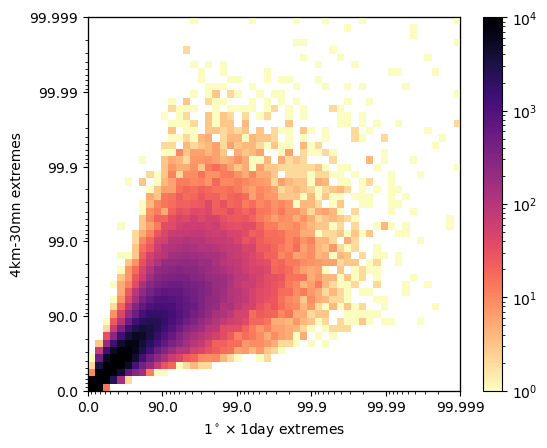

In [39]:
countbin = jd_max.count_mcs_in_jdist()
jd_max.plot_data(jd_max.bincount, scale = 'log', cmap=plt.cm.magma_r, vbds = (1, 1e4))

# T2mm

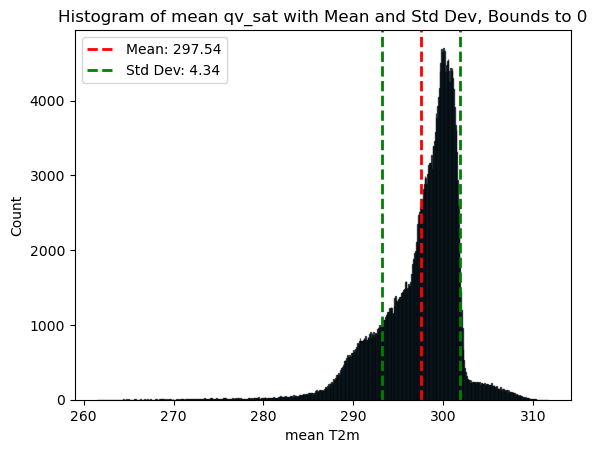

In [62]:
import numpy as np
import matplotlib.pyplot as plt

X = temp.mean_T2mm.values.ravel()   
X_mean = np.mean(X)
X_std = np.std(X)

# Create histogram with manually adjusted bins
bins = int(np.sqrt(len(X)))

plt.hist(X, bins=bins, edgecolor='black', alpha=0.7)

# Add mean and standard deviation to the plot
plt.axvline(X_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {X_mean:.2f}')
plt.axvline(X_mean + X_std, color='green', linestyle='dashed', linewidth=2, label=f'Std Dev: {X_std:.2f}')
plt.axvline(X_mean - X_std, color='green', linestyle='dashed', linewidth=2)

# Add labels and title
plt.xlabel('mean T2m')
plt.ylabel('Count')
plt.title('Histogram of mean qv_sat with Mean and Std Dev, Bounds to 0')

# Show legend
plt.legend()

# Display the plot
plt.show()

# no day offset

In [43]:
spatial_where_inf_300 = list(np.where(temp.mean_T2mm < 300))
spatial_where_300_301 = list(np.where((temp.mean_T2mm >= 300) & (temp.mean_T2mm < 301)))
spatial_where_301_302 = list(np.where((temp.mean_T2mm >= 301) & (temp.mean_T2mm < 302)))
spatial_where_sup_302 = list(np.where(temp.mean_T2mm >= 302))

days_offset = len(prec.days) - len(temp.days) #add n to this value and get rid off last n_days to compare temp lagged

spatial_where_inf_300[2] = spatial_where_inf_300[2]+days_offset
spatial_where_300_301[2] = spatial_where_300_301[2]+days_offset
spatial_where_301_302[2] = spatial_where_301_302[2]+days_offset
spatial_where_sup_302[2] = spatial_where_sup_302[2]+days_offset

mean_prec_t2m_inf_300 = prec.mean_Prec.values[spatial_where_inf_300[0], spatial_where_inf_300[1], spatial_where_inf_300[2]]
mean_prec_t2m_300_301 = prec.mean_Prec.values[spatial_where_300_301[0], spatial_where_300_301[1], spatial_where_300_301[2]]
mean_prec_t2m_301_302 = prec.mean_Prec.values[spatial_where_301_302[0], spatial_where_301_302[1], spatial_where_301_302[2]]
mean_prec_t2m_sup_302 = prec.mean_Prec.values[spatial_where_sup_302[0], spatial_where_sup_302[1], spatial_where_sup_302[2]]

max_prec_t2m_inf_300 = prec.max_Prec.values[spatial_where_inf_300[0], spatial_where_inf_300[1], spatial_where_inf_300[2]]
max_prec_t2m_300_301 = prec.max_Prec.values[spatial_where_300_301[0], spatial_where_300_301[1], spatial_where_300_301[2]]
max_prec_t2m_301_302 = prec.max_Prec.values[spatial_where_301_302[0], spatial_where_301_302[1], spatial_where_301_302[2]]
max_prec_t2m_sup_302 = prec.max_Prec.values[spatial_where_sup_302[0], spatial_where_sup_302[1], spatial_where_sup_302[2]]

bincount_t2m_inf_300, _ , _ = np.histogram2d(x = mean_prec_t2m_inf_300, y = max_prec_t2m_inf_300, bins =(jd_max.bins1, jd_max.bins2), density=False)
bincount_t2m_300_301, _ , _ = np.histogram2d(x = mean_prec_t2m_300_301, y = max_prec_t2m_300_301, bins =(jd_max.bins1, jd_max.bins2), density=False)
bincount_t2m_301_302, _ , _ = np.histogram2d(x = mean_prec_t2m_301_302, y = max_prec_t2m_301_302, bins =(jd_max.bins1, jd_max.bins2), density=False)
bincount_t2m_sup_302, _ , _ = np.histogram2d(x = mean_prec_t2m_sup_302, y = max_prec_t2m_sup_302, bins =(jd_max.bins1, jd_max.bins2), density=False)

/scratchx/mcarenso/ipykernel_2975853/1183729404.py:8: RuntimeWarning: invalid value encountered in divide
  jd_max.plot_data(bincount/jd_max.bincount, scale = 'linear', cmap=plt.cm.magma_r, vbds = (0, 1), fig = fig, ax = ax, label = 'count of events '+label)


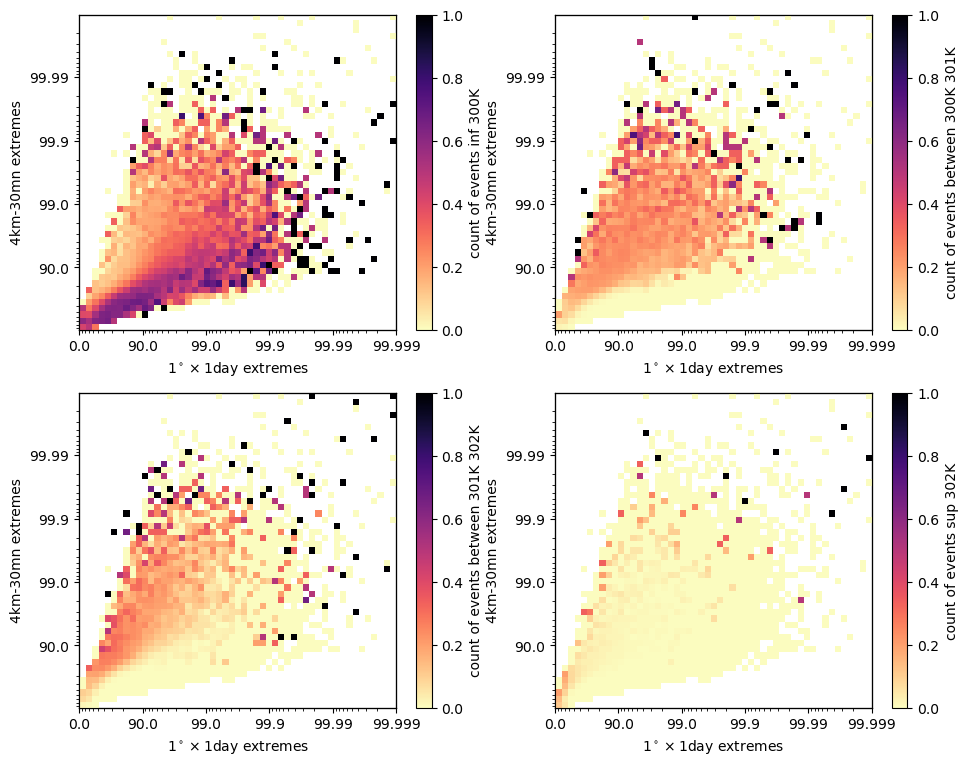

In [44]:
fig,axs =plt.subplots(nrows=2, ncols=2, figsize =(11.25, 9))


bincounts = [bincount_t2m_inf_300, bincount_t2m_300_301, bincount_t2m_301_302, bincount_t2m_sup_302]
labels = ["inf 300K", "between 300K 301K", "between 301K 302K", "sup 302K"]

for bincount, ax, label in zip(bincounts, axs.flatten(), labels):
    jd_max.plot_data(bincount/jd_max.bincount, scale = 'linear', cmap=plt.cm.magma_r, vbds = (0, 1), fig = fig, ax = ax, label = 'count of events '+label)

# Heavy Prec for sample 2

In [25]:
jd = joint_distrib.JointDistribution(gr, nd=5, heavy_bool = True, overwrite =True, storm_tracking=True)

Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
/data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOBAL/2016/FileTracking/TOOCAN-GLOBAL-20160901-20160910.dat.gz
/data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOBAL/2016/FileTracking/TOOCAN-GLOBAL-20160801-20160831.dat.gz


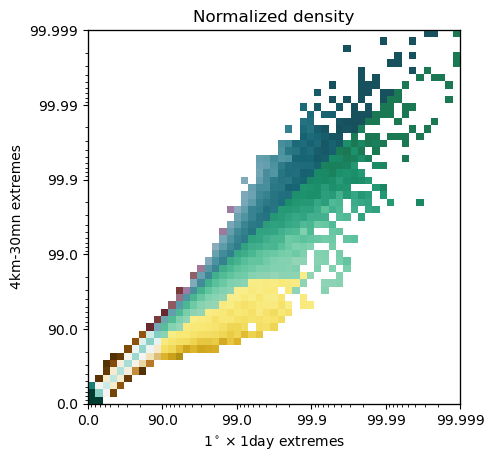

In [137]:
%matplotlib inline
jd.plot(branch=False)

<AxesSubplot:xlabel='1$^\\circ\\times 1$day extremes', ylabel='4km-30mn extremes'>

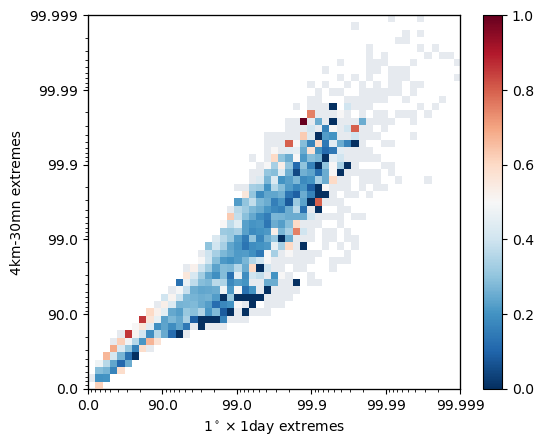

In [138]:
data, noise = jd.get_mcs_bin_fraction()
jd.plot_data(data, noise, branch=False)

In [23]:
import pickle as pkl 
from tempest import conditionalstats
from tempest import conditionalstats_chunked

file = pkl.load(open("/home/mcarenso/code/tempest/input/dist_pr.pickle", 'rb'))

ModuleNotFoundError: No module named 'conditionalstats_chunked'

In [24]:
temp = gr.get_var_id_ds("T2mm")
prec = gr.get_var_id_ds("Prec")

In [28]:
countbin = jd.count_mcs_in_jdist()
jd.plot_data(jd.bincount, scale = 'log', cmap=plt.cm.magma_r, vbds = (1, 1e4))

<AxesSubplot:xlabel='1$^\\circ\\times 1$day extremes', ylabel='4km-30mn extremes'>

In [30]:
%matplotlib inline

/scratchx/mcarenso/ipykernel_2975853/919879114.py:35: RuntimeWarning: invalid value encountered in divide
  jd.plot_data(bincount/jd.bincount, scale = 'linear', cmap=plt.cm.magma_r, vbds = (0, 1), fig = fig, ax = ax, label = 'count of events '+label)


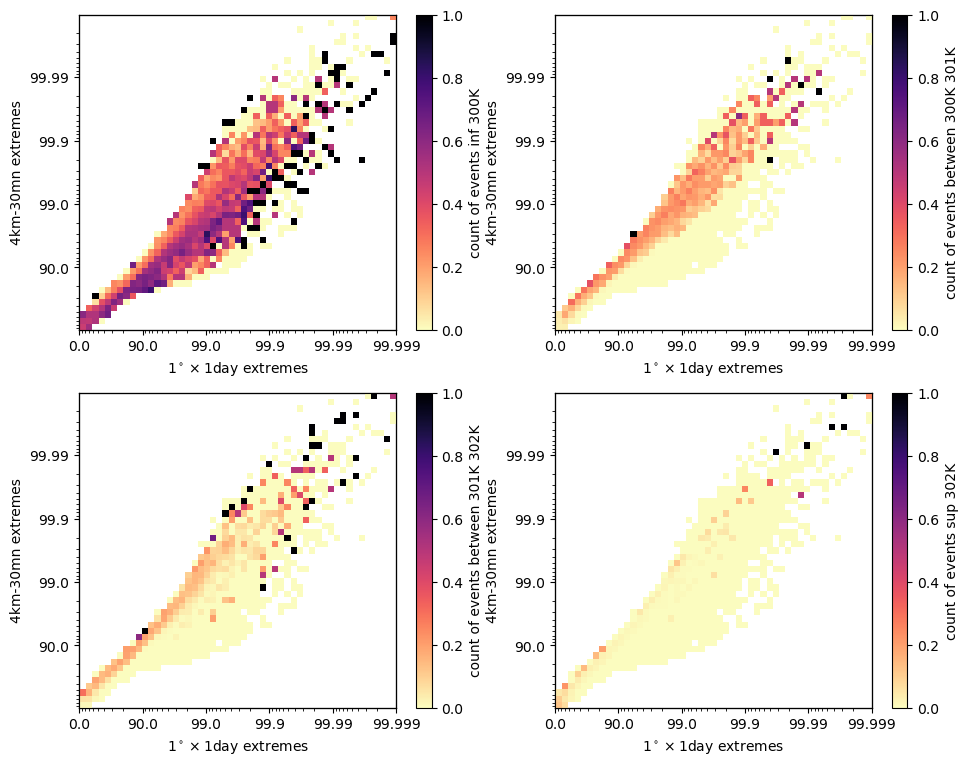

In [34]:
spatial_where_inf_300 = list(np.where(temp.mean_T2mm < 300))
spatial_where_300_301 = list(np.where((temp.mean_T2mm >= 300) & (temp.mean_T2mm < 301)))
spatial_where_301_302 = list(np.where((temp.mean_T2mm >= 301) & (temp.mean_T2mm < 302)))
spatial_where_sup_302 = list(np.where(temp.mean_T2mm >= 302))

days_offset = len(prec.days) - len(temp.days) #add n to this value and get rid off last n_days to compare temp lagged

spatial_where_inf_300[2] = spatial_where_inf_300[2]+days_offset
spatial_where_300_301[2] = spatial_where_300_301[2]+days_offset
spatial_where_301_302[2] = spatial_where_301_302[2]+days_offset
spatial_where_sup_302[2] = spatial_where_sup_302[2]+days_offset

mean_prec_t2m_inf_300 = prec.mean_Prec.values[spatial_where_inf_300[0], spatial_where_inf_300[1], spatial_where_inf_300[2]]
mean_prec_t2m_300_301 = prec.mean_Prec.values[spatial_where_300_301[0], spatial_where_300_301[1], spatial_where_300_301[2]]
mean_prec_t2m_301_302 = prec.mean_Prec.values[spatial_where_301_302[0], spatial_where_301_302[1], spatial_where_301_302[2]]
mean_prec_t2m_sup_302 = prec.mean_Prec.values[spatial_where_sup_302[0], spatial_where_sup_302[1], spatial_where_sup_302[2]]

max_prec_t2m_inf_300 = prec.heavy_Prec.values[spatial_where_inf_300[0], spatial_where_inf_300[1], spatial_where_inf_300[2]]
max_prec_t2m_300_301 = prec.heavy_Prec.values[spatial_where_300_301[0], spatial_where_300_301[1], spatial_where_300_301[2]]
max_prec_t2m_301_302 = prec.heavy_Prec.values[spatial_where_301_302[0], spatial_where_301_302[1], spatial_where_301_302[2]]
max_prec_t2m_sup_302 = prec.heavy_Prec.values[spatial_where_sup_302[0], spatial_where_sup_302[1], spatial_where_sup_302[2]]

bincount_t2m_inf_300, _ , _ = np.histogram2d(x = mean_prec_t2m_inf_300, y = max_prec_t2m_inf_300, bins =(jd.bins1, jd.bins2), density=False)
bincount_t2m_300_301, _ , _ = np.histogram2d(x = mean_prec_t2m_300_301, y = max_prec_t2m_300_301, bins =(jd.bins1, jd.bins2), density=False)
bincount_t2m_301_302, _ , _ = np.histogram2d(x = mean_prec_t2m_301_302, y = max_prec_t2m_301_302, bins =(jd.bins1, jd.bins2), density=False)
bincount_t2m_sup_302, _ , _ = np.histogram2d(x = mean_prec_t2m_sup_302, y = max_prec_t2m_sup_302, bins =(jd.bins1, jd.bins2), density=False)

fig,axs =plt.subplots(nrows=2, ncols=2, figsize =(11.25, 9))


bincounts = [bincount_t2m_inf_300, bincount_t2m_300_301, bincount_t2m_301_302, bincount_t2m_sup_302]
labels = ["inf 300K", "between 300K 301K", "between 301K 302K", "sup 302K"]

for bincount, ax, label in zip(bincounts, axs.flatten(), labels):
    jd.plot_data(bincount/jd.bincount, scale = 'linear', cmap=plt.cm.magma_r, vbds = (0, 1), fig = fig, ax = ax, label = 'count of events '+label)

# 2 days offset - remove 2 days or index mismatch

In [131]:
spatial_where_inf_300 = list(np.where(temp.mean_T2mm < 300))
spatial_where_300_301 = list(np.where((temp.mean_T2mm >= 300) & (temp.mean_T2mm < 301)))
spatial_where_301_302 = list(np.where((temp.mean_T2mm >= 301) & (temp.mean_T2mm < 302)))
spatial_where_sup_302 = list(np.where(temp.mean_T2mm >= 302))

days_offset = len(prec.days) - len(temp.days) + 2 

spatial_where_inf_300[2] = spatial_where_inf_300[2]+days_offset
spatial_where_300_301[2] = spatial_where_300_301[2]+days_offset
spatial_where_301_302[2] = spatial_where_301_302[2]+days_offset
spatial_where_sup_302[2] = spatial_where_sup_302[2]+days_offset

# mean_prec_t2m_inf_300 = prec.mean_Prec.values[spatial_where_inf_300[0], spatial_where_inf_300[1], spatial_where_inf_300[2]]
# mean_prec_t2m_300_301 = prec.mean_Prec.values[spatial_where_300_301[0], spatial_where_300_301[1], spatial_where_300_301[2]]
# mean_prec_t2m_301_302 = prec.mean_Prec.values[spatial_where_301_302[0], spatial_where_301_302[1], spatial_where_301_302[2]]
# mean_prec_t2m_sup_302 = prec.mean_Prec.values[spatial_where_sup_302[0], spatial_where_sup_302[1], spatial_where_sup_302[2]]

# max_prec_t2m_inf_300 = prec.max_Prec.values[spatial_where_inf_300[0], spatial_where_inf_300[1], spatial_where_inf_300[2]]
# max_prec_t2m_300_301 = prec.max_Prec.values[spatial_where_300_301[0], spatial_where_300_301[1], spatial_where_300_301[2]]
# max_prec_t2m_301_302 = prec.max_Prec.values[spatial_where_301_302[0], spatial_where_301_302[1], spatial_where_301_302[2]]
# max_prec_t2m_sup_302 = prec.max_Prec.values[spatial_where_sup_302[0], spatial_where_sup_302[1], spatial_where_sup_302[2]]

# bincount_t2m_inf_300, _ , _ = np.histogram2d(x = mean_prec_t2m_inf_300, y = max_prec_t2m_inf_300, bins =(jd.bins1, jd.bins2), density=False)
# bincount_t2m_300_301, _ , _ = np.histogram2d(x = mean_prec_t2m_300_301, y = max_prec_t2m_300_301, bins =(jd.bins1, jd.bins2), density=False)
# bincount_t2m_301_302, _ , _ = np.histogram2d(x = mean_prec_t2m_301_302, y = max_prec_t2m_301_302, bins =(jd.bins1, jd.bins2), density=False)
# bincount_t2m_sup_302, _ , _ = np.histogram2d(x = mean_prec_t2m_sup_302, y = max_prec_t2m_sup_302, bins =(jd.bins1, jd.bins2), density=False)